In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder,StandardScaler
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

In [5]:
# Load dataset
dt = pd.read_excel(r"C:\Users\nirik\myfiles\myprojects\machine learning\Customer Segmentation using Hierarchical Clustering\data\Online Retail.xlsx")

In [7]:
dt.head(4)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
dt.shape

(541909, 8)

In [35]:
data=dt.sample(n=2000,random_state=42)

In [36]:
data['Country'].value_counts()

Country
United Kingdom     1807
Germany              38
France               37
EIRE                 36
Spain                14
Switzerland          10
Netherlands           9
Norway                6
Australia             6
Belgium               4
Italy                 4
Unspecified           4
Finland               3
Cyprus                3
Denmark               2
USA                   2
Portugal              2
Austria               2
Sweden                2
Channel Islands       2
RSA                   1
Poland                1
Canada                1
Japan                 1
Bahrain               1
Hong Kong             1
Iceland               1
Name: count, dtype: int64

In [37]:
data.drop(columns=['StockCode',	'Description','InvoiceDate','CustomerID','InvoiceNo'],inplace=True)

In [38]:
le=LabelEncoder()
data['Country']=le.fit_transform(data['Country'])

In [39]:
data.sample(2)

,Quantity,UnitPrice,Country
273849,2,1.25,25
166813,1,7.46,25


In [40]:
data.isnull().sum()

Quantity     0
UnitPrice    0
Country      0
dtype: int64

In [41]:
data.dtypes

Quantity       int64
UnitPrice    float64
Country        int32
dtype: object

In [42]:
#data['UnitPrice']=data['UnitPrice'].astype(int)

In [43]:
data.dtypes

Quantity       int64
UnitPrice    float64
Country        int32
dtype: object

In [45]:
data.to_excel(r'C:\Users\nirik\myfiles\myprojects\machine learning\Customer Segmentation using Hierarchical Clustering\data\_processed_dataset.xlsx',index=False)

In [19]:
x=data.iloc[:,:]

In [20]:
ss=StandardScaler()
scaled_data=ss.fit_transform(x)

In [21]:
from sklearn.decomposition import PCA

In [22]:
pca=PCA(n_components=2,random_state=42)

In [23]:
pca_data=pca.fit_transform(scaled_data)

In [24]:
pca_data_df=pd.DataFrame(pca_data,columns=['pca component 1','pca component 2'])

In [25]:
pca_data_df.sample(4)

,pca component 1,pca component 2
455,-0.619647,-0.984412
654,0.374512,0.310359
1321,0.221046,-0.241773
27,0.457536,-0.032866


In [26]:
pca_data_df.shape

(2000, 2)

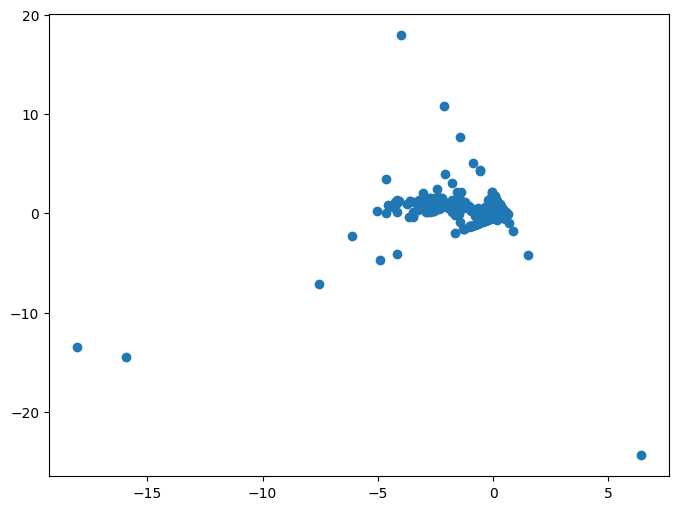

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(x='pca component 1',y='pca component 2',data=pca_data_df)
plt.show()

In [28]:
features=pca_data_df[['pca component 1','pca component 2']]

In [29]:
features.shape

(2000, 2)

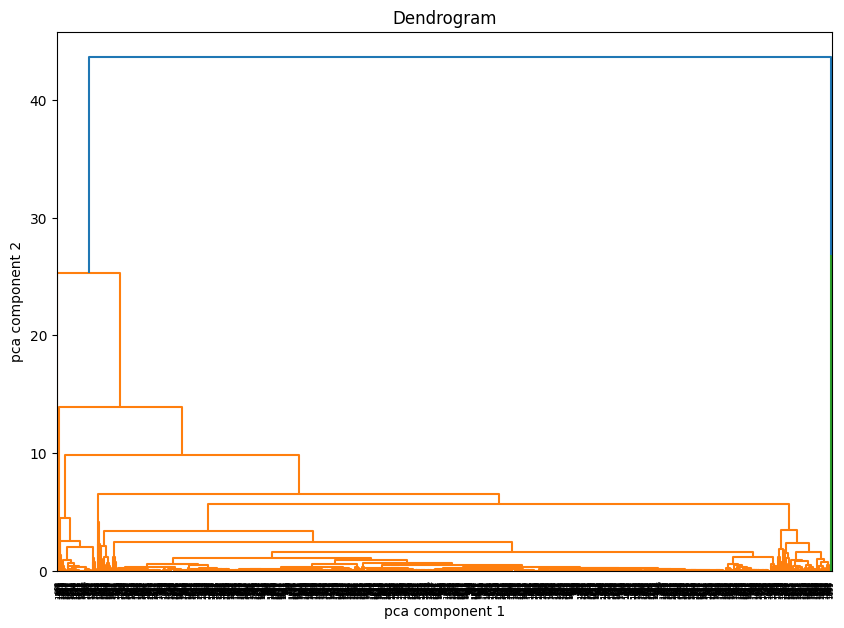

In [30]:
link=linkage(features,'complete')
plt.figure(figsize=(10, 7))
dendrogram(link)
plt.title('Dendrogram')
plt.xlabel('pca component 1')
plt.ylabel('pca component 2')
plt.show()


In [31]:
ac=AgglomerativeClustering(n_clusters=3,linkage='complete')

In [32]:
preds=ac.fit_predict(features)

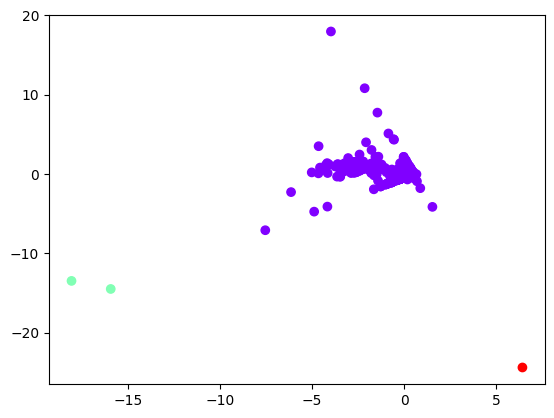

In [33]:
plt.scatter(pca_data_df.iloc[:,0],pca_data_df.iloc[:,1],c=preds,cmap='rainbow')